# Audio Classification Using Machine Learning

Writer: E.W

Date: 07/18

In [1]:
%load_ext lab_black

## Data Preprocessing

### Loading the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
# Load the data
df = pd.read_csv("data/features_30_sec.csv")

In [3]:
# Overview
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1000.0,6.620308e+05,1.784074e+03,6.600000e+05,661504.000000,6.617940e+05,6.617940e+05,6.758080e+05
chroma_stft_mean,1000.0,3.786817e-01,8.170489e-02,1.719392e-01,0.319562,3.831479e-01,4.359417e-01,6.636847e-01
chroma_stft_var,1000.0,8.633982e-02,7.735298e-03,4.455525e-02,0.082298,8.661463e-02,9.125551e-02,1.081115e-01
rms_mean,1000.0,1.309297e-01,6.568311e-02,5.276444e-03,0.086657,1.224431e-01,1.756822e-01,3.979734e-01
rms_var,1000.0,3.051399e-03,3.634500e-03,4.294372e-06,0.000942,1.816440e-03,3.577055e-03,2.767948e-02
spectral_centroid_mean,1000.0,2.201781e+03,7.159606e+02,5.700404e+02,1627.697311,2.209263e+03,2.691295e+03,4.435244e+03
spectral_centroid_var,1000.0,4.696916e+05,4.008995e+05,7.911251e+03,184350.530174,3.384862e+05,6.121479e+05,3.036843e+06
spectral_bandwidth_mean,1000.0,2.242541e+03,5.263165e+02,8.980662e+02,1907.240605,2.221393e+03,2.578470e+03,3.509646e+03
spectral_bandwidth_var,1000.0,1.370792e+05,9.645567e+04,1.078719e+04,67376.554428,1.119775e+05,1.823716e+05,6.947848e+05
rolloff_mean,1000.0,4.571549e+03,1.574792e+03,7.491406e+02,3380.069642,4.658524e+03,5.533810e+03,8.677673e+03


In [4]:
# Check the shape
df.shape

(1000, 60)

In [5]:
# Display the first 5 rows
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [6]:
# Check the number of labels
df.label.value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [7]:
# Check for missing values
df.isna().sum().sum()

0

In [8]:
# Check for duplicated values
df.duplicated().sum()

0

### Feature Engineering

In [9]:
# Shuffle the dataset
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Get the features and target
df.drop(["filename", "length"], axis=1, inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 57), (1000,))

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding
scaler = StandardScaler()
le = LabelEncoder()

X = scaler.fit_transform(X)
y = le.fit_transform(y)
X.shape, y.shape

((1000, 57), (1000,))

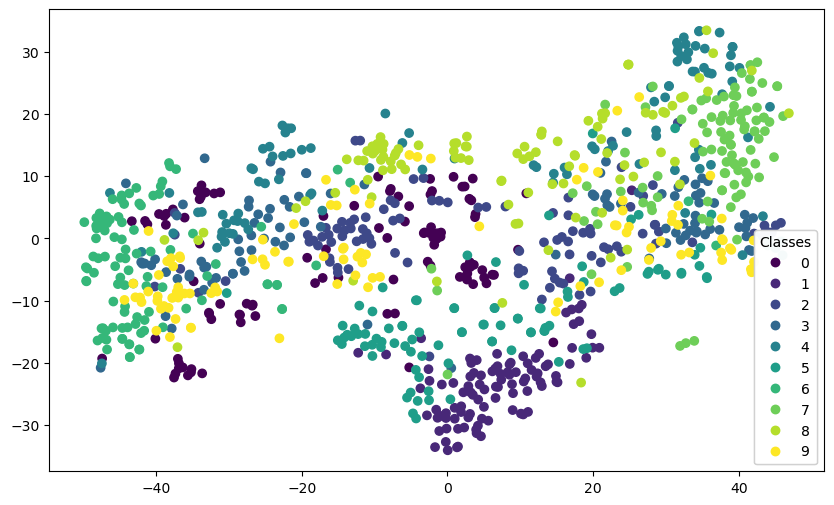

In [11]:
from sklearn.manifold import TSNE

# TSNE for cluster checking
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=y, cmap="viridis")

# Create a legend
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend)

plt.show()

### Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 57), (200, 57), (800,), (200,))

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([80, 87, 73, 79, 85, 78, 75, 87, 77, 79]))

In [14]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([20, 13, 27, 21, 15, 22, 25, 13, 23, 21]))

## Building and Evaluating Classifiers

### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)


# Training
def train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model


# Evaluation
def eval(model, X_test, y_test, acc_df):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    print("Accuracy: ", accuracy)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("Classification Report: \n", classification_report(y_test, y_pred))

    new_row = pd.DataFrame(
        {
            "Model": [model.__class__.__name__],
            "Accuracy": [accuracy],
            "Precision": [precision],
            "Recall": [recall],
            "F1": [f1],
        }
    )
    new_row.fillna(0, inplace=True)
    return pd.concat([acc_df, new_row], ignore_index=True)


# Initialize accuracy dataframe
acc_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn = train(knn, X_train, y_train)
acc_df = eval(knn, X_test, y_test, acc_df)

Accuracy:  0.655
Confusion Matrix: 
 [[11  0  3  0  0  0  1  0  1  4]
 [ 0 11  0  0  0  2  0  0  0  0]
 [ 1  1 21  0  1  1  0  0  1  1]
 [ 2  0  2 14  1  0  1  1  0  0]
 [ 0  0  0  1  9  0  0  3  2  0]
 [ 0  1  3  1  0 15  0  1  0  1]
 [ 0  0  0  3  0  0 21  0  0  1]
 [ 1  0  0  1  0  1  0  9  1  0]
 [ 1  0  2  3  5  0  1  1 10  0]
 [ 3  1  4  1  0  0  0  1  1 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.79      0.85      0.81        13
           2       0.60      0.78      0.68        27
           3       0.58      0.67      0.62        21
           4       0.56      0.60      0.58        15
           5       0.79      0.68      0.73        22
           6       0.88      0.84      0.86        25
           7       0.56      0.69      0.62        13
           8       0.62      0.43      0.51        23
           9       0.59      0.48      0.53        21

    accurac

### Random Forest

Accuracy:  0.66
Confusion Matrix: 
 [[15  0  0  0  0  1  3  0  0  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 5  0 15  1  0  1  1  0  2  2]
 [ 0  0  0 12  5  0  2  0  1  1]
 [ 0  0  0  1 10  0  0  2  2  0]
 [ 0  0  0  0  0 20  0  1  0  1]
 [ 1  0  0  1  0  0 23  0  0  0]
 [ 1  0  0  0  2  0  0  8  1  1]
 [ 1  0  4  3  5  0  0  0  7  3]
 [ 0  0  2  4  1  2  2  0  1  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       1.00      1.00      1.00        13
           2       0.71      0.56      0.63        27
           3       0.55      0.57      0.56        21
           4       0.43      0.67      0.53        15
           5       0.83      0.91      0.87        22
           6       0.74      0.92      0.82        25
           7       0.73      0.62      0.67        13
           8       0.50      0.30      0.38        23
           9       0.50      0.43      0.46        21

    accuracy

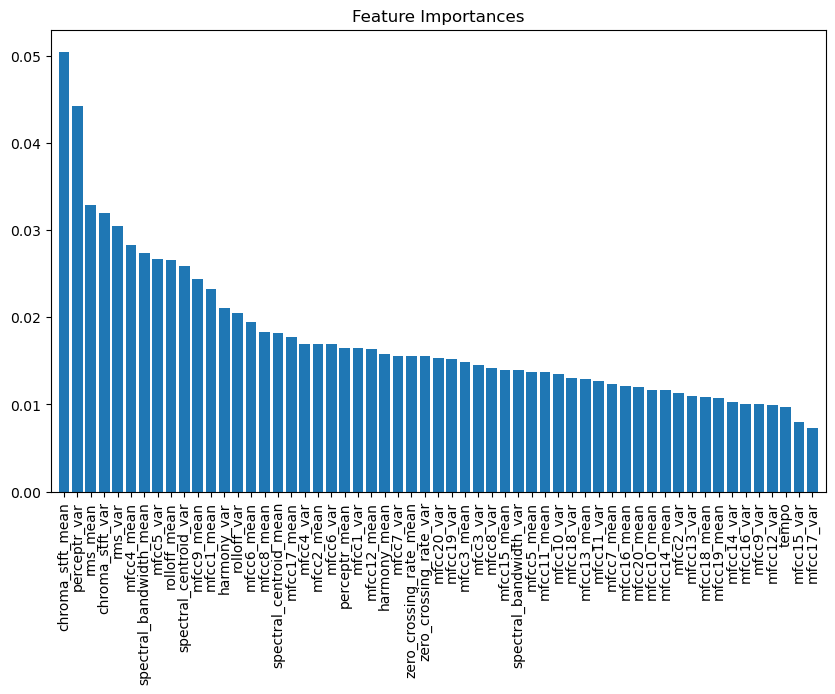

In [16]:
from sklearn.ensemble import RandomForestClassifier


# Plot feature importances
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()


# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = train(rf, X_train, y_train)
acc_df = eval(rf, X_test, y_test, acc_df)
plot_feature_importances(rf, df.columns[:-1])

### SVM

In [17]:
from sklearn.svm import SVC

# SVM
svc = SVC(kernel="linear")
svc = train(svc, X_train, y_train)
acc_df = eval(svc, X_test, y_test, acc_df)

Accuracy:  0.7
Confusion Matrix: 
 [[16  0  0  0  0  1  0  0  1  2]
 [ 0 12  0  0  0  1  0  0  0  0]
 [ 5  0 18  0  0  0  0  0  0  4]
 [ 1  0  1 14  2  0  0  1  1  1]
 [ 0  0  0  0 12  0  0  1  2  0]
 [ 3  0  2  1  0 15  0  0  0  1]
 [ 0  0  0  0  2  0 22  0  0  1]
 [ 0  0  0  0  0  0  0 11  2  0]
 [ 3  0  1  4  2  0  1  1 10  1]
 [ 2  0  3  1  2  0  1  0  2 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.80      0.64        20
           1       1.00      0.92      0.96        13
           2       0.72      0.67      0.69        27
           3       0.70      0.67      0.68        21
           4       0.60      0.80      0.69        15
           5       0.88      0.68      0.77        22
           6       0.92      0.88      0.90        25
           7       0.79      0.85      0.81        13
           8       0.56      0.43      0.49        23
           9       0.50      0.48      0.49        21

    accuracy 

### Gradient Boosting

Accuracy:  0.69
Confusion Matrix: 
 [[15  0  2  0  0  0  2  0  0  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 4  0 15  3  1  0  0  0  3  1]
 [ 1  0  0 13  3  0  0  0  2  2]
 [ 0  0  0  1 11  0  0  0  3  0]
 [ 2  0  0  0  0 19  0  1  0  0]
 [ 2  0  0  1  0  0 22  0  0  0]
 [ 0  0  0  0  1  0  0  9  2  1]
 [ 1  0  1  3  3  0  0  1 13  1]
 [ 2  0  5  3  1  0  0  0  2  8]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.75      0.64        20
           1       1.00      1.00      1.00        13
           2       0.65      0.56      0.60        27
           3       0.54      0.62      0.58        21
           4       0.55      0.73      0.63        15
           5       1.00      0.86      0.93        22
           6       0.92      0.88      0.90        25
           7       0.82      0.69      0.75        13
           8       0.52      0.57      0.54        23
           9       0.57      0.38      0.46        21

    accuracy

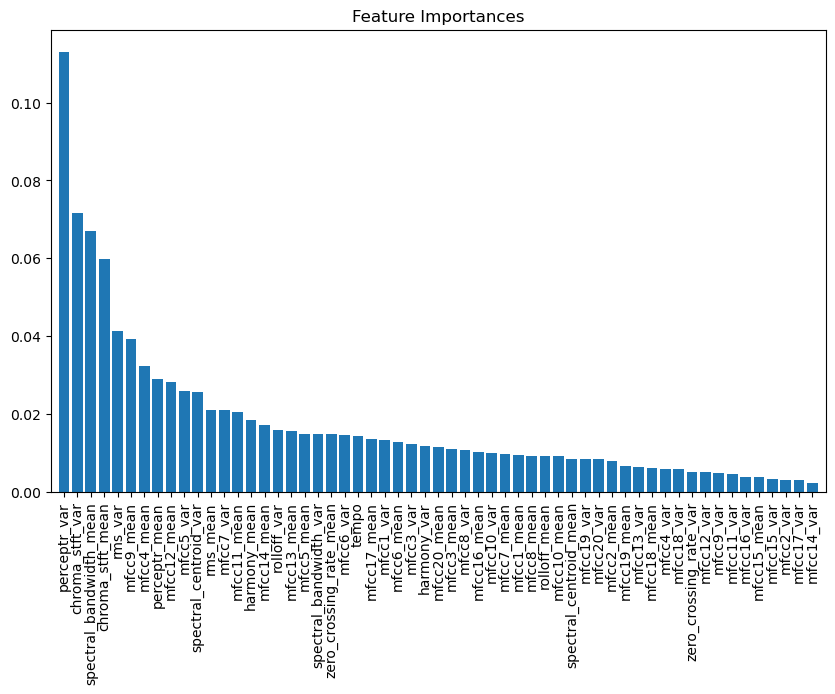

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb = train(gb, X_train, y_train)
acc_df = eval(gb, X_test, y_test, acc_df)
plot_feature_importances(gb, df.columns[:-1])

### MLP

In [19]:
from sklearn.neural_network import MLPClassifier

# Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp = train(mlp, X_train, y_train)
acc_df = eval(mlp, X_test, y_test, acc_df)

Accuracy:  0.74
Confusion Matrix: 
 [[17  0  2  0  0  0  0  0  0  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 4  0 18  0  0  1  1  1  0  2]
 [ 1  0  0 13  5  0  0  0  1  1]
 [ 0  0  0  0 10  0  1  0  4  0]
 [ 0  0  0  0  0 20  0  1  0  1]
 [ 0  0  0  1  0  0 23  0  0  1]
 [ 0  0  1  0  0  0  0 11  1  0]
 [ 1  0  1  2  3  0  2  1 11  2]
 [ 1  0  1  2  1  1  0  1  2 12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       1.00      1.00      1.00        13
           2       0.78      0.67      0.72        27
           3       0.72      0.62      0.67        21
           4       0.53      0.67      0.59        15
           5       0.91      0.91      0.91        22
           6       0.85      0.92      0.88        25
           7       0.73      0.85      0.79        13
           8       0.58      0.48      0.52        23
           9       0.60      0.57      0.59        21

    accuracy

## Analysis and Visualization

In [20]:
acc_df

,Model,Accuracy,Precision,Recall,F1
0,KNeighborsClassifier,0.655,0.659823,0.655,0.651920
1,RandomForestClassifier,0.660,0.658209,0.660,0.650860
2,SVC,0.700,0.713136,0.700,0.700138
3,GradientBoostingClassifier,0.690,0.704289,0.690,0.690877
4,MLPClassifier,0.740,0.740520,0.740,0.736940


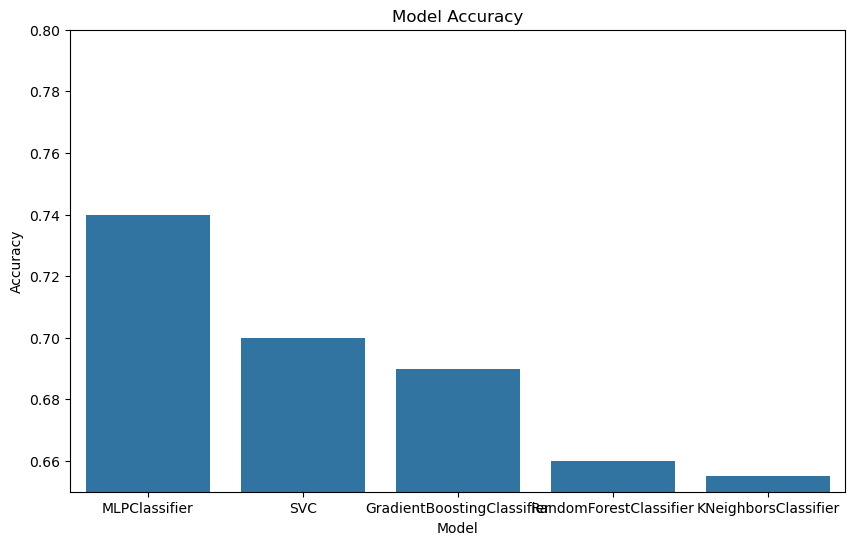

In [21]:
# Plot accuracy
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Model",
    y="Accuracy",
    data=acc_df,
    order=acc_df.sort_values("Accuracy", ascending=False).Model,
)
plt.ylim(0.65, 0.8)
plt.title("Model Accuracy")
plt.show()